# Stock Forecasting using PyFlux

### GAS local linear trend models

https://github.com/RJT1990/pyflux

In [1]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling and Forecasting
# ==============================================================================
import pyflux as pf

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Yahoo finance is used to fetch data 
# ==============================================================================
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2020-01-01' # input 
end = '2022-07-18'  # input
df = yf.download(symbol, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Date
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
2020-01-08    3253.050049
Name: Adj Close, dtype: float64

In [4]:
df.tail()

Date
2022-07-11    3854.429932
2022-07-12    3818.800049
2022-07-13    3801.780029
2022-07-14    3790.379883
2022-07-15    3863.159912
Name: Adj Close, dtype: float64

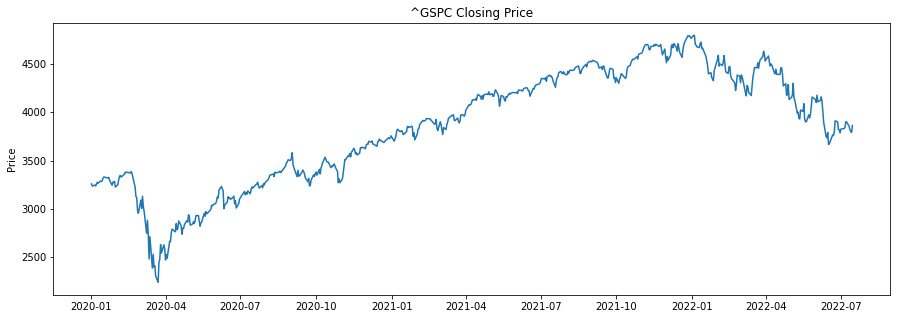

In [5]:
plt.figure(figsize=(15,5))
plt.title(symbol + " Closing Price")
plt.ylabel("Price")
plt.plot(df)

In [6]:
df.shape

(639,)

In [7]:
df_value = pd.DataFrame(np.log(df))
df_value.index = pd.to_datetime(df.index)
df_value.columns = ['Price']

In [8]:
model = pf.GASLLT(data=df_value-np.mean(df_value),family=pf.Skewt())

In [9]:
x = model.fit('BBVI', iterations=20000, record_elbo=True)

10% done : ELBO is -2576.1801914975526, p(y,z) is -2562.1717592571727, q(z) is 14.008432240380206
20% done : ELBO is 319.29485736614794, p(y,z) is 334.4062410458184, q(z) is 15.111383679670414
30% done : ELBO is 632.1969518547306, p(y,z) is 648.1477209624404, q(z) is 15.950769107709768
40% done : ELBO is 705.0571754995245, p(y,z) is 721.7142802975848, q(z) is 16.657104798060207
50% done : ELBO is 756.9461179461498, p(y,z) is 774.062011036359, q(z) is 17.115893090209127
60% done : ELBO is 235.11932423996797, p(y,z) is 252.6715193847612, q(z) is 17.552195144793256
70% done : ELBO is 857.4942943651506, p(y,z) is 875.4936729879714, q(z) is 17.999378622820757
80% done : ELBO is 904.6592119032468, p(y,z) is 923.1288756390959, q(z) is 18.46966373584906
90% done : ELBO is 900.910798360705, p(y,z) is 919.6586714623725, q(z) is 18.747873101667437
100% done : ELBO is 953.7150339502615, p(y,z) is 972.737948676626, q(z) is 19.0229147263646

Final model ELBO is 939.5599556292459


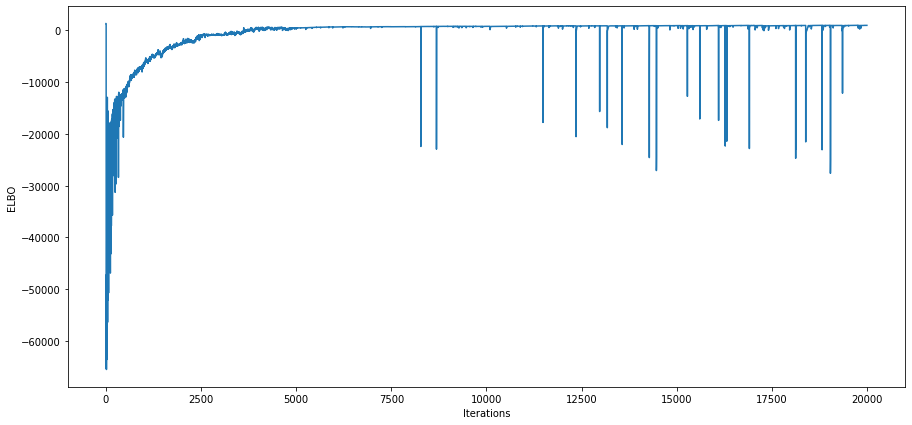

In [10]:
x.plot_elbo(figsize=(15,7))

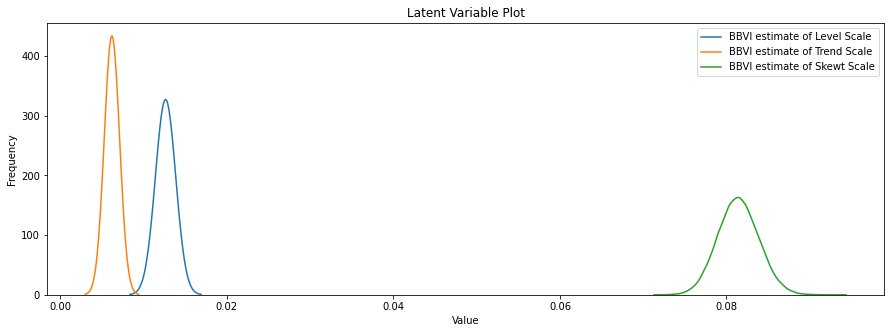

In [11]:
model.plot_z([0,1,3])

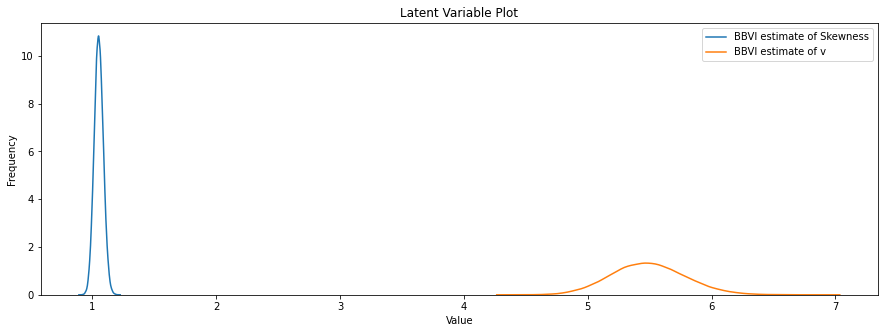

In [12]:
model.plot_z([2,4])

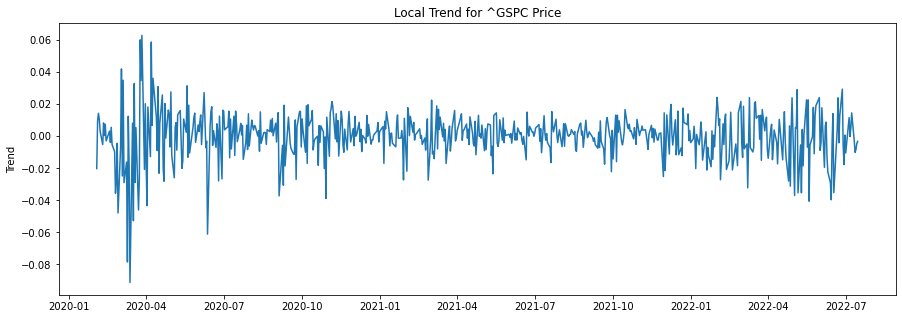

In [13]:
plt.figure(figsize=(15,5))
plt.title("Local Trend for " + symbol + " Price")
plt.ylabel("Trend")
plt.plot(df_value.index[21:],x.states[1][20:])

In [14]:
print("Average growth rate for this period is")
print(str(round(100*np.mean(np.exp(np.diff(model.predict(h=4)['Price'].values)) - 1),3)) + "%")


Average growth rate for this period is
1.888%
